## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 1: Let's GOOOOO!

- **100 points [7% of your final grade]**
- **Due Tuesday, February 13 by 11:59pm**

***Goals of this homework:***
1. Collect data from the web, clean it, and then make some observations based on exploratory data analysis
2. Understand and implement the classic apriori algorithm and extensions to find the association rules in a movie rating dataset

***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

***Late Days:***

As a reminder, you may use up to three of your late days on this homework, meaning the latest we will accept it is February 16 by 11:59pm.

***Collaboration declaration:***

If you worked with someone on this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

## (50 points) Part 1: UFOs

### (10pts) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going 
to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. 
You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. 
In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** 
and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [43]:

from bs4 import BeautifulSoup
import numpy as np
import csv
import requests
import pandas as pd
import re
from collections import defaultdict
import math
from itertools import combinations
from random import sample
from matplotlib import pyplot as plt

In [44]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufos_in_texas.csv'

req=requests.get('http://www.nuforc.org/webreports/ndxlTX.html')
soup_data=BeautifulSoup(req.text,'html.parser')


In [45]:
#print (soup_data)

In [46]:
rows=[]


for t_row in soup_data.find_all('tr'):

  cols=t_row.find_all('td')
  row=[]
  if cols:
    for col in cols:
      row.append(col.text)
    rows.append(row)

column_names=[]
for col_names in soup_data.find_all('th'):
  column_names.append(col_names.text)


with open('ufos_in_texas.csv', 'w') as csvfl:
    wr = csv.writer(csvfl)
    wr.writerow(column_names)
    wr.writerows(rows)

Once you have your local csv file, you should read it in and then issue the .head() command.

In [47]:
# your code here
ufo=pd.read_csv('ufos_in_texas.csv')
ufo.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
2,12/9/21 16:30,Lazerbet,TX,Other,Google maping,It's big,12/19/21
3,12/9/21 16:00,Lazerbet,TX,Triangle,NaN,Unhuman,12/19/21
4,12/7/21 17:30,Oak Cliff,TX,Unknown,NaN,I was randomly taking pictures of the clouds a...,12/19/21


### (15pts) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

You may find the **pandas** library to be very helpful for this part. Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [48]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds


ufo_filtered= ufo[ufo['Duration'].apply(lambda x: True if re.search('^\d+ (second|minute|hour|day)s?$', str(x)) else False)].copy()

def convert_to_seconds(duration):
  converter={'second':1,'minute':60,'hour':60*60,'day':60*60*24,'seconds':1,'minutes':60,'hours':60*60,'days':60*60*24}

  temp=duration.split()

  return int(temp[0])*converter[temp[1]]

ufo_filtered['Duration']=ufo_filtered['Duration'].apply(convert_to_seconds)

ufo_filtered.head()


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,480,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,600,A light that was fading in and out.,12/19/21
14,11/6/21 14:00,Abilene,TX,Changing,1800,"I was outside waiting on my ride, when a white...",11/15/21
16,10/25/21 17:18,Corpus Christi,TX,Other,2400,Seven United States Postal workers in Corpus C...,10/26/21
18,10/23/21 03:30,Garland,TX,Light,25200,Early morning site & short encounter,11/15/21


In [49]:

# your code here
# total rows in original dataset
# valid rows in your new 'validated' dataset

print ("Total rows in the original dataset: {}".format(ufo.shape[0]))
print ("Total rows in the new validated dataset: {}".format(ufo_filtered.shape[0]))


Total rows in the original dataset: 5631
Total rows in the new validated dataset: 2817


Maximum : 345600
Minimum : 1
Mean : 1290.827831025914
Standard Deviation : 10850.471660312376


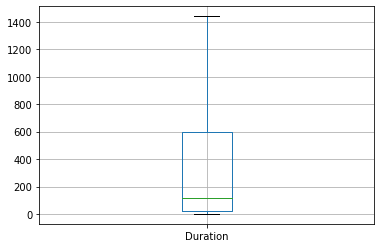

In [50]:
# your code here
# report the basic statistics of duration in 'validated' dataset
# boxplot code here

print('Maximum : {}'.format(max(ufo_filtered['Duration'])))
print('Minimum : {}'.format(min(ufo_filtered['Duration'])))
print('Mean : {}'.format(ufo_filtered['Duration'].mean()))
print('Standard Deviation : {}'.format(ufo_filtered['Duration'].std()))

bx=ufo_filtered.boxplot(column=['Duration'],showfliers=False)

### (15pts) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [51]:
# your code here 
# clean data 
# convert cleaned durations to seconds
def clean_durations(durations):
  
  st=str(durations)

   #taking average of data which are in the form of a range

  m = re.match(r"\D*([0-9]+)\s*[-to]+\s*([0-9]+)\D*", st)

  if m:

      st=re.sub(r'\d+\s*[-to]+\s*\d+',str(int((float(m.group(1))+float(m.group(2)))/2)),st)

  #rounding the decimal values
  m = re.match(r"\D*([0-9]+).([0-9]+)\D*", st)

  if m:
      if (float("."+m.group(2))>=.5):
          st=re.sub(r'\d+.\d+',str(int(m.group(1))+1),st)
      else:
          st=re.sub(r'\d+.\d+',str(int(m.group(1))),st)



  #converting all time notations to either minute, second, or hour
  st=re.sub(r'mi.*','minute',st)
  st=re.sub(r'se.*','second',st)
  st=re.sub(r'hr.*','hour',st)
  st=re.sub(r'ho.*','hour',st)
  st=re.sub(r'MI.*','minute',st)
  st=re.sub(r'SE.*','second',st)
  st=re.sub(r'HR.*','hour',st)
  st=re.sub(r'HO.*','hour',st)
  st=re.sub(r'da.*','day',st)
  st=re.sub(r'DA.*','day',st)
  st=re.sub(r'\s+s\s+','second',st)


  # taking into consideration the formats like HH:MM:SS, MM:SS, :SS

  m = re.match(r"\D*([0-9]+):([0-9]+):([0-9]+)\D*", st)

  if m:
      st=str(int(float(m.group(1))*60*60+float(m.group(2))*60+float(m.group(3))))+" seconds"

  m = re.match(r"\D*([0-9]+):([0-9]+)\D*", st)

  if m:
      st=str(int(float(m.group(1))*60+float(m.group(2))))+" seconds"

  m = re.match(r":([0-9]+)\D*", st)

  if m:
      st=str(int(float(m.group(1))))+" seconds"


  #ignoring all other special characters
  st=re.sub(r'[^a-z*\s*0-9*]','',st)
  #removing extra spaces
  st=re.sub(r'[\s*]','',st)

  #final formatting to only keep integer and time type
  m = re.match(r"\D*([0-9]+).*((second)|(minute)|(hour)|(day))", st)
  if m:
      st=m.group(1)+" "+m.group(2)

  
  # print ("{}-{}".format(str(durations),st))
  return st


ufo_new=ufo.copy()

ufo_new['Duration']=ufo_new['Duration'].apply(clean_durations)

ufo_filtered= ufo_new[ufo_new['Duration'].apply(lambda x: True if re.search('^\d+ (second|minute|hour|day)s?$', str(x)) else False)].copy()


ufo_filtered['Duration']=ufo_filtered['Duration'].apply(convert_to_seconds)

ufo_filtered.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,480,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,600,A light that was fading in and out.,12/19/21
5,12/3/21 21:00,Sanderson,TX,Light,60,Sighting of odd light in night sky.,12/19/21
12,11/12/21 10:00,Hickory Creek,TX,Circle,120,2 identical circular orange spheres traveling ...,11/15/21
14,11/6/21 14:00,Abilene,TX,Changing,1800,"I was outside waiting on my ride, when a white...",11/15/21


In [52]:
# your code here
# total rows in original dataset
# valid rows in your cleaned dataset


print ("Total rows in the original dataset: {}".format(ufo.shape[0]))
print ("Total rows in the new validated dataset: {}".format(ufo_filtered.shape[0]))

Total rows in the original dataset: 5631
Total rows in the new validated dataset: 4626


Maximum : 345600
Minimum : 0
Mean : 1339.8808906182446
Standard Deviation : 9861.193785934574


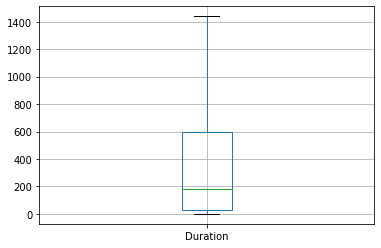

In [53]:
# your code here
# report the basic statistics of duration in your cleaned dataset
# draw a boxplot for your cleaned dataset


print('Maximum : {}'.format(max(ufo_filtered['Duration'])))
print('Minimum : {}'.format(min(ufo_filtered['Duration'])))
print('Mean : {}'.format(ufo_filtered['Duration'].mean()))
print('Standard Deviation : {}'.format(ufo_filtered['Duration'].std()))

bx=ufo_filtered.boxplot(column=['Duration'], showfliers=False)

### (5pts) Part 1d: Observations and Conclusions

Based on your analysis on part 1b and 1c, what observations or conclusions can you make from the data?

## ANSWER:

1. On taking a quick glance at the original data it can be said that most of the data entered by the people is useless and mostly fake. There are several errors in the data, such as duration mentioned in years. The reason for this may be attributed to the fact that users are manually given the input data and there is no review system for this kind of data on this website.
2. From the box plots we can see that there are many outliers in the duration data which are most likely erroneous data. These are far away from the median duration.
3. After proper cleaning of the data, almost 1000 data rows was discarded which were most likely useless and errorneous data

### (5pts) Part 1e: Next Steps

Now is your chance to conduct an interesting analysis on the UFO data you have collected. This is open-ended, so you may choose whatever direction you like. For example, you might want to take a look at the shape of the UFOs or perhaps the temporal aspects of the reports. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aee9f4150>]],
      dtype=object)

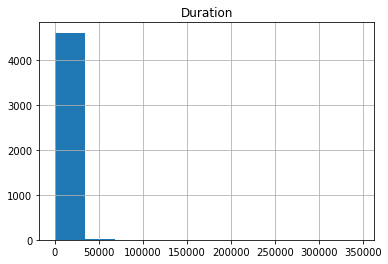

In [54]:

# your code here

def to_lower(text):
  return str(text).lower()


ufo_filtered['Shape']=ufo_filtered['Shape'].apply(to_lower)
ufo_filtered['City']=ufo_filtered['City'].apply(to_lower)



ufo_filtered.hist(column='Duration')



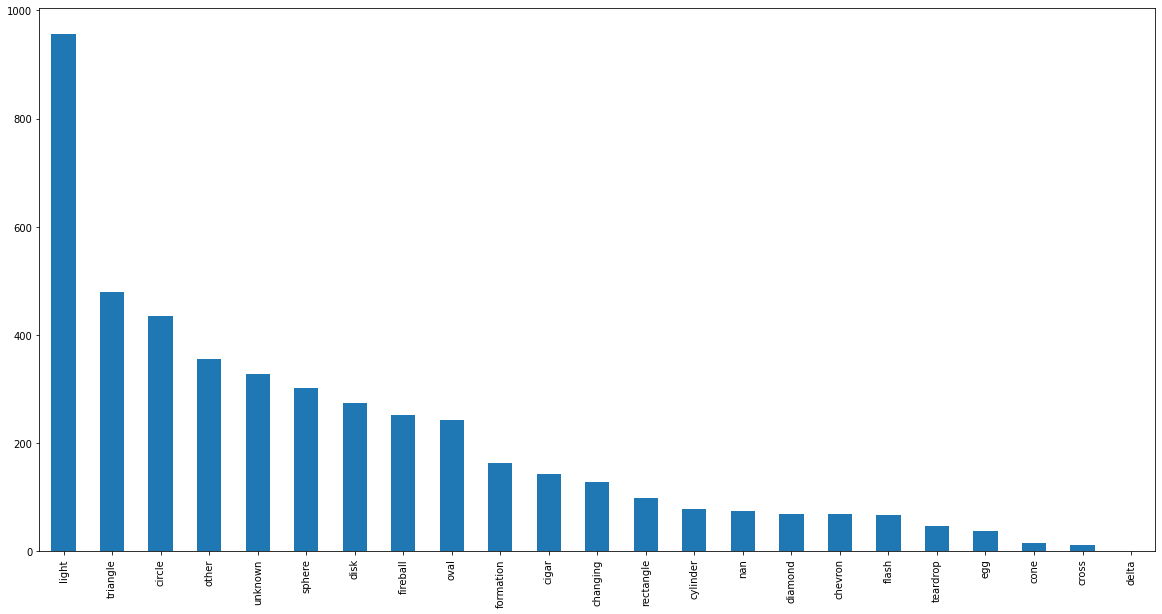

In [55]:
ufo_filtered['Shape'].value_counts().plot(kind='bar',figsize=(20, 10))

*tell us what next steps you took, and what you discovered*

## ANSWER:

From the 2 plots following can be said:

1. From the first plot of 'Durations' it can be seen that most of the reported ufo sighting durations was just a few seconds indicating a misunderstanding on the reporter's part. The sighting would have been credible if it would have lasted for a while so that proper evidence could be collected such as pictures/videos but such reports of long duration sightings is very less.

2. From the second plot of 'Shape' it can be seen that most of the reporters had reported seeing a light, followed by reports of seeing a triangular shape and circular shape. So it can be said that most of the reporters might have seen some flashes of light from some object and have misunderstood them for an ufo. Combining the 'Durations' data we can say that the bright flashes of light would have lasted for a very short duration causing more confusion in the reporter's eyes about the proper identity of the light emanating object.

## (50 points) Part 2: Association Rules in Movie Rating Behaviors

For the second part of this homework, we're going to examine movies using our understanding of association rules, to find movies that "go together". For this part, you will implement the apriori algorithm, and apply it to a movie rating dataset. We'll use the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.

First, run the next cell to load the dataset we are going to use.

In [56]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [57]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In this dataset, there are four columns: `userId` is the integer ids of users, `movieId` is the integer ids of movies, `rating` is the rate of the user gives to the movie, and `timestamp` which we do not use here. Each row denotes that the user of given `userId` rated the movie of the given `movieId`. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors where:

1. Define `rating` >= 3 is "like" (that is, only consider movie ratings of 3 or higher in your baskets; you may ignore all others)
2. `minsup` == 40 (out of 600 users/baskets); we may adjust this based on the discussion on Campuswire
3. `minconf` == to be determined by a discussion on Campuswire. You may try several different choices, but we will converge on a good choice for everyone for the final submission.
 
We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

To help get you started, we can load the ratings with the following code snippet:

In [58]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")
allRatings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### (15pts) Step 1: Implement Apriori Algorithm
In this section, you need to implement the Apriori algorithm, we will check the correctness of your code and we encourage efficient implementation and skills of pruning.

In [59]:
# your code here

# configurations

# minimum support = 150/(total number of baskets which we calculate later)
minsup=150/609

#minimum confidence= 0.8
minconf=0.8

#given minimum rating=3
min_rating=3

In [60]:
#creating the baskets and storing a set of all movie IDs
movies=set()
def generate_baskets(allRatings):
  baskets={}
  for r_data in allRatings.iterrows():
    #checking if rating is greater than provided minimum rating
    if r_data[1]['rating']>=min_rating:
      #extracting the userID and movieID
      user=int(r_data[1]['userId'])
      movie=int(r_data[1]['movieId'])
      movies.add(movie)
      if user not in baskets:
        baskets[user]=set()
      #adding movieId to userId basket
      baskets[user].add(movie)
  return baskets

baskets=generate_baskets(allRatings)

print (baskets)
print (movies)





{1: {1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, 1032, 2054, 2058, 2571, 527, 1552, 1042, 2580, 1049, 2078, 543, 3617, 1060, 1573, 2596, 552, 553, 2090, 1580, 2093, 2094, 47, 2096, 1073, 50, 1587, 2099, 3639, 1080, 2105, 2616, 1089, 1090, 2115, 1092, 2116, 70, 2628, 1097, 3147, 590, 592, 593, 1617, 2640, 596, 1620, 2641, 2644, 2648, 1625, 2137, 2139, 3671, 2141, 2654, 2143, 608, 2657, 3168, 101, 1127, 1644, 110, 1136, 2161, 3702, 3703, 2174, 2692, 648, 1676, 2700, 2193, 3729, 661, 151, 2716, 157, 3740, 3744, 673, 163, 3243, 1196, 1197, 1198, 3247, 3253, 1206, 1208, 1210, 1213, 1214, 1220, 1732, 1222, 1224, 2761, 1226, 3273, 3793, 216, 1240, 2268, 733, 223, 736, 2273, 3809, 231, 1256, 1258, 235, 2797, 1265, 1777, 2291, 1270, 1275, 1278, 1793, 1282, 260, 2826, 1291, 780, 1804, 1805, 1298, 2329, 804, 296, 2858, 2353, 2872, 3386, 316, 2366, 1348, 333, 2387, 2899, 2395, 349, 1377, 356, 2916, 2406, 362, 2414, 367, 3439, 3440, 3441, 1396, 3448, 3450, 2427, 1408, 1920, 2944, 2947, 2948, 2949,

In [61]:
print ("Number of baskets: {}".format(len(baskets)))
print ("Number of unique movie IDs: {}".format(len(movies)))

Number of baskets: 609
Number of unique movie IDs: 8452


In [62]:
#function that returns the support value
def get_support(itemset, baskets):
  count = 0
  for user in baskets.keys():
    #counting the number of times the itemset is present in all the baskets
    if set(itemset).issubset(baskets[user]):
      count += 1
  # returning the support as a ratio of number of times the itemset is present in all the baskets/total number of baskets
  return count/len(baskets)


#funcion to get a set of all the unique items from the different frequent itemsets
def get_unique_itemset(freq_items):
    freq_itemset = set()
    for items in freq_items:
        for item in items:
            #adding item to the set freq_itemset which contains only unique values of items
            freq_itemset.add(item)

    return freq_itemset


#Function to get combinations of items of size 'size' from the frequent itemset provided
def get_Combinations(freq_items, size):

    # calling get_unique_itemset to get a set of all the unique items from the different frequent itemsets
    freq_itemset=get_unique_itemset(freq_items)
    #getting the combinations of items of size 'size' from the set of all unique items
    combination = list(combinations(freq_itemset, size))

    return combination


#function that returns a list containing tuples of frequent items. The function takes the list of itemset combinations and the baskets dictionary as input and
#returns the frequent itemsets from those itemset combinations
def get_Frequent_Items(combination,baskets):
    freq_items = []
    #iterating over all the itemset combinations
    for itemset in combination:
      # print (minsup)
      #checking if the support of the current itemset is greater than minsup by using the function get_support and the baskets dictionary
      if get_support(itemset, baskets) >= minsup:
            #appending the itemset to the frequent itemset list if the support of the itemset is greater than the minsup
            freq_items.append(itemset)
            
    return freq_items

#function to calculate the confidence of a particular association rule
def get_Confidence(items_union, items, baskets):
    #calculating support of items_union and items
    items_union_support=get_support(items_union, baskets)
    items_support=get_support(items, baskets)
    #Confidence(A -> B) = Support_count(A ∪ B) / Support_count(A)
    return items_union_support/items_support


#function to get the rules which has confidence greater than minconf value
def get_Rules(freq_items, baskets):
    # print("called")
    rules=[]
    #iterating over all the frequent itemsets
    for fq_items in freq_items:
        items_union = set(fq_items)
        #iterating over all the items in the itemset
        for item in items_union:
            #removing a particular item form the itemset to check the confidence of the association rule (items_union - {item}) -> item
            items = items_union - {item}
            #appending (items_union - {item}, item) to the rules list if the confidence of the association rule (items_union - {item}) -> item is greater than minconf
            if get_Confidence(items_union, items, baskets) >= minconf:
                rules.append((items, item))
                # print (rules)
    return rules



#function to prune certain combinations. If a combination A of size k is not present in k-frequent-itemsets then combinations of size k+1 containing A 
#as the subset should also not be present in k+1-frequent-itemsets. So we get all the k sizes combinations of a particular k+1 size itemset and check whether
#all the k size combination are in the k-frequent-itemsets. If even one of them is not present in the k-frequent-itemsets then we discard that
#particular k+1 size itemset.
def prune(freq_items,prev_freq_items,size):
    #we will create a copy freq_items_new of freq_items since we want to remove items from freq_items_new while iterating over freq_items
    freq_items_new = freq_items.copy()
    # print (freq_items_new)
    #iterating over freq_items
    for item in freq_items:
        #creating all the combinations of size k from the k+1 size itemset
        combs = combinations(item, size)
        #iterating over all the combinations
        for comb in combs:
            #If comb is not present in the k-frequent-itemsets then we remove the k+1 size itemset from freq_items_new
            if(comb not in prev_freq_items):
                freq_items_new.remove(item)
                #we break after one of the combs satisfies the condition
                break
    # print (freq_items_new)
    #returning the pruned frequent itemset
    return freq_items_new

#the apriori algorithm which takes the baskets dictionary as input
def apriori(baskets):

    #creating empty lists of all association rules, all frequent itemsets
    all_association_rules = []
    all_frequent_itemsets=[]
    #freq_items stores frequent itemsets for the current iteration, it is initially empty for size=0
    freq_items=[]
    #empty list to store previous frequent itemset useful for the pruning purpose
    prev_freq_items=[]
    #size stores the size of the frequent itemsets starting with 0
    size=0
    #we loop until we have length of the updated k frequent itemsets greater than 0 for the successive kth iterations. Since initially when size=0,
    #we have frequent itemsets list empty I have added the condition 'or size<1' so that it initially enters the loop even when len(freq_items)=0
    #which was as we had initialized
    while len(freq_items) > 0 or size<1:
        if size==0:
          #when size=0 we take all the items into the itemsets_all set
          list_of_freq_items=list(baskets.values())
          itemsets_all=get_unique_itemset(list_of_freq_items)
          #itemsets_all now contains all the unique items
          combination=[(i,) for i in itemsets_all]
          #combination is a list containing tuples of size 1 items
          #using get_Frequent_Items function to get frequent itemsets from combination
          freq_items = get_Frequent_Items(combination,baskets)
          
        else:
          #we enter here when size>1
          #we get all the itemset combinations of size 'size' from the previous 'size-1' frequent itemsets
          combination= get_Combinations(freq_items, size)
          #using get_Frequent_Items function to get frequent itemsets from combination conatining itemset combinations of size 'size'
          freq_items = get_Frequent_Items(combination,baskets)
          #if size==1 we initialize previous frequent itemsets as the 1-frequent itemsets
          if size==1:
            prev_freq_items=freq_items.copy()
          #if size>1 we prune frequent itemsets first using the previous iterations frequent itemset which was stored
          #and then update the previous iterations frequent itemsets
          else:
            #pruning for itemsets of size greater than 2
            freq_items=prune(freq_items,prev_freq_items,size-1)
            #Updating previous frequent itemset
            prev_freq_items=freq_items.copy()
          #printing count of k-frequent itemsets and the frequent items
          print ("Count of Frequent {}-itemsets: {} \n Frequent items:{}".format(size, len(freq_items), freq_items))
          #storing all frequent itemsets
          all_frequent_itemsets=all_frequent_itemsets+freq_items

          # print (len(get_Rules(freq_items, baskets)))
          # print (len(all_association_rules))

          # Storing all the association rules. We get the relevant association rules using the get_Rules function
          all_association_rules=all_association_rules+get_Rules(freq_items,  baskets)

          # print (len(all_association_rules))
        size+=1
    #returning all the association rules and frequent itemsets
    return all_association_rules, all_frequent_itemsets

In [63]:
all_association_rules, all_frequent_itemsets=apriori(baskets)
print ("All Frequent itemsets: {}".format(all_frequent_itemsets))
print ("Number of association rules: {}".format(len(all_association_rules)))

Count of Frequent 1-itemsets: 37 
 Frequent items:[(1,), (4993,), (260,), (2571,), (780,), (527,), (2959,), (150,), (32,), (296,), (2858,), (1196,), (1198,), (47,), (50,), (1210,), (318,), (5952,), (457,), (2762,), (588,), (589,), (590,), (592,), (593,), (4306,), (858,), (480,), (608,), (356,), (364,), (2028,), (110,), (7153,), (1270,), (3578,), (380,)]
Count of Frequent 2-itemsets: 30 
 Frequent items:[(4993, 5952), (4993, 7153), (260, 2571), (260, 1196), (260, 1210), (2571, 2959), (2571, 296), (2571, 1196), (2571, 318), (2571, 356), (527, 318), (527, 356), (2959, 318), (150, 356), (296, 47), (296, 50), (296, 318), (296, 593), (296, 356), (296, 110), (1196, 1210), (50, 318), (318, 593), (318, 356), (318, 110), (5952, 7153), (589, 356), (593, 356), (480, 356), (356, 110)]
Count of Frequent 3-itemsets: 2 
 Frequent items:[(296, 318, 593), (296, 318, 356)]
Count of Frequent 4-itemsets: 0 
 Frequent items:[]
All Frequent itemsets: [(1,), (4993,), (260,), (2571,), (780,), (527,), (2959,), 

### (5pts) Step 2: Print Your Association Rules

Next you should print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> 
movie_name_k**

where the movie names can be fetched by joining the movieId with the file `movies.csv`. For example, one rule that you might find is:

**Matrix, The (1999),  Star Wars: Episode V - The Empire Strikes Back (1980),  Star Wars: Episode IV - A New Hope (1977),  -> 
Star Wars: Episode VI - Return of the Jedi (1983)**

In [64]:
# your code here
Movies = pd.read_csv("ml-latest-small/movies.csv")

#function to get the movie name based on the movie id

def movie_name(Id):
  movie= Movies.loc[Movies['movieId']==Id]
  return movie['title'].values[0]

#function to print all the calculated association rules. It takes all_association_rules list of tuples as input

def print_rules(all_association_rules):
  index=1
  
  for rules in all_association_rules:
    # print(rules)
    print ("{}. {} --> {}".format(index,', '.join([movie_name(Id) for Id in rules[0]]), movie_name(rules[1]) ))
    index+=1

In [65]:
print_rules(all_association_rules)

1. Lord of the Rings: The Fellowship of the Ring, The (2001) --> Lord of the Rings: The Two Towers, The (2002)
2. Lord of the Rings: The Two Towers, The (2002) --> Lord of the Rings: The Fellowship of the Ring, The (2001)
3. Lord of the Rings: The Return of the King, The (2003) --> Lord of the Rings: The Fellowship of the Ring, The (2001)
4. Lord of the Rings: The Fellowship of the Ring, The (2001) --> Lord of the Rings: The Return of the King, The (2003)
5. Star Wars: Episode V - The Empire Strikes Back (1980) --> Star Wars: Episode IV - A New Hope (1977)
6. Star Wars: Episode VI - Return of the Jedi (1983) --> Star Wars: Episode IV - A New Hope (1977)
7. Apollo 13 (1995) --> Forrest Gump (1994)
8. Seven (a.k.a. Se7en) (1995) --> Pulp Fiction (1994)
9. Star Wars: Episode VI - Return of the Jedi (1983) --> Star Wars: Episode V - The Empire Strikes Back (1980)
10. Lord of the Rings: The Return of the King, The (2003) --> Lord of the Rings: The Two Towers, The (2002)
11. Lord of the Ring

### (15pts) Step 3: Implement Random Sampling

We discussed in class a method to randomly sample baskets to avoid the overhead of reading the entire set of baskets (which in practice, could amount to billions of baskets). For this part, you should implement such a random sampling approach that takes a special parameter **alpha** that controls the size of the sample: e.g., alpha = 0.10 means to sample 10% of the baskets (our users, in this case). 

Vary **alpha** and report the number of frequent itemsets you find and how this compares to the number of frequent itemsets in the entire dataset. What do you discover?


In [66]:
# your code here

minsup=150/609

#function to randomly sample the baskets based on the alpha factor
def random_sampling(baskets, alpha):

  n = len(baskets)
  #sampled_ids will contain the samples basket keys from all the baskets. It will have length = lenght(original_baskets)*alpha
  sampled_ids = sample(list(baskets.keys()), int(n * alpha))
  sampled_baskets=defaultdict(list)
  for id in sampled_ids:
    sampled_baskets[id]=baskets[id]
  return sampled_baskets


#funtion to print all the relevant data associated with the randomly sampled baskets data after running apriori algorithm on it
def print_random_sampling_data(start, end,ranges, baskets_k):
  alphas=[]
  num_freqs=[]
  num_assoc=[]
  for alpha in np.arange(start, end,ranges):
    print("\nData for alpha = {}\n".format(alpha))
    sampled_baskets=random_sampling(baskets_k, alpha)
    sampled_association_rules, sampled_frequent_itemsets=apriori(sampled_baskets)
    print ("Number of baskets = {}, number of association rules = {}, number of frequent itemsets = {}".format(len(sampled_baskets),len(sampled_association_rules), len(sampled_frequent_itemsets)))
    print_rules(sampled_association_rules)
    alphas.append(alpha)
    num_freqs.append(len(sampled_frequent_itemsets))
    num_assoc.append(len(sampled_association_rules))
  return alphas,num_assoc,num_freqs


alphas,num_assoc,num_freqs=print_random_sampling_data(0.2, 0.9,0.1,baskets)


Data for alpha = 0.2

Count of Frequent 1-itemsets: 37 
 Frequent items:[(1,), (4993,), (260,), (648,), (2571,), (780,), (527,), (2959,), (150,), (32,), (296,), (2858,), (1196,), (1198,), (47,), (50,), (1210,), (318,), (5952,), (457,), (588,), (589,), (592,), (593,), (4306,), (595,), (858,), (480,), (608,), (356,), (364,), (2028,), (110,), (7153,), (1270,), (377,), (380,)]
Count of Frequent 2-itemsets: 29 
 Frequent items:[(260, 2571), (260, 296), (260, 1196), (260, 593), (260, 356), (2571, 2959), (2571, 296), (2571, 318), (2571, 593), (2571, 356), (527, 318), (527, 356), (150, 356), (296, 47), (296, 50), (296, 318), (296, 593), (296, 356), (296, 110), (47, 593), (47, 356), (50, 318), (318, 593), (318, 356), (457, 356), (593, 356), (593, 110), (480, 356), (356, 110)]
Count of Frequent 3-itemsets: 0 
 Frequent items:[]
Number of baskets = 121, number of association rules = 8, number of frequent itemsets = 66
1. Star Wars: Episode V - The Empire Strikes Back (1980) --> Star Wars: Episod

Text(0, 0.5, 'number of frequent itemsets')

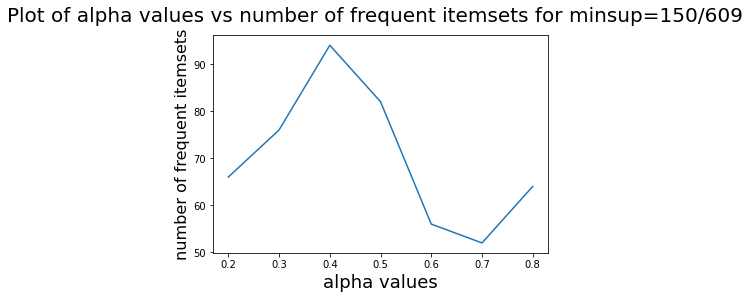

In [67]:
  #plotting graphs
  fig=plt.figure()
  plt.plot(alphas,num_freqs)
  fig.suptitle('Plot of alpha values vs number of frequent itemsets for minsup={}/{}'.format('150','609'), fontsize=20)
  plt.xlabel('alpha values', fontsize=18)
  plt.ylabel('number of frequent itemsets', fontsize=16)

Text(0, 0.5, 'number of association rules')

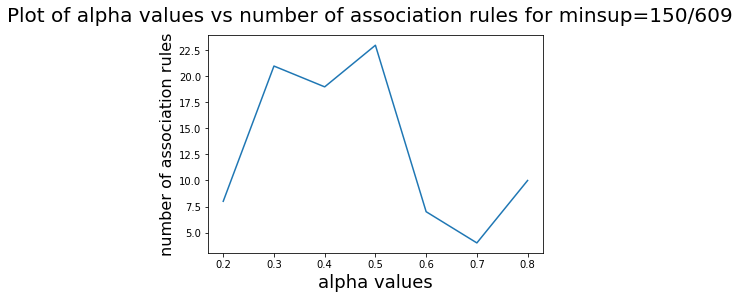

In [68]:
    #plotting graphs
fig=plt.figure()
plt.plot(alphas,num_assoc)
fig.suptitle('Plot of alpha values vs number of association rules for minsup={}/{}'.format('150','609'), fontsize=20)
plt.xlabel('alpha values', fontsize=18)
plt.ylabel('number of association rules', fontsize=16)

*your discussion here*

## ANSWER:

### I have varied the values of alpha (random sampling factor) between 0.2 to 0.9 at an incremental rate of 0.1 and printed the number of baskets, number of association rules, number of frequent itemsets, and the association rules for the corresponding alphas as shown above. Also the plot of alpha values vs number of frequent itemsets and  plot of alpha values vs number of association rules for minsup=150/609 is shown above. From the above data, the following can be said:

1. The number of frequency itemsets and number of association rules are somewhat increasing for decrease in the value of alpha for some executions of the code when we are executing the above code multiple times, though for the most part the trend is random as the sampling done is random in nature so the apriori algorithm works with random subset of data each time sampling is done.

2. The occasional increase in number of frequency itemsets and number of association rules for decreasing the values of alpha can be attributed to the fact that for decraesing alpha many false positive frequency itemsets and association rules are being generated. We will calculate the number of false positives generate in the next section of the code.

3. As the value of alpha gets closer to 1 we got more correct rules as we are taking a greater subset of the original dataset. 

4. At times, most of the rules generated in a larger value of alpha is a subset of the rules generated by a smaller value of alpha as for smaller values many false positives are also generated along with generation of accurate rules

### (10pts) Step 4: Check for False Positives

Next you should verify that the candidate pairs you discover by random sampling are truly frequent by comparing to the itemsets you discover over the entire dataset. 

For this part, consider another parameter **minsup_sample** that relaxes the minimum support threshold. For example if we want minsup = 1/100 for whole dataset, then try minsup_sample = 1/125 for the sample. This will help catch truly frequent itemsets.

Vary **minsup_sample** and report the number of frequent itemsets you find and the number of false positives you find. What do you discover?


For Minsup: 150/609

Data for Minsup: 150/609 for alpha = 0.5

Count of Frequent 1-itemsets: 33 
 Frequent items:[(1,), (4993,), (260,), (2571,), (780,), (527,), (2959,), (150,), (32,), (296,), (2858,), (1196,), (1198,), (47,), (50,), (1210,), (318,), (58559,), (5952,), (457,), (2762,), (588,), (589,), (592,), (593,), (858,), (480,), (608,), (356,), (2028,), (110,), (7153,), (1270,)]
Count of Frequent 2-itemsets: 25 
 Frequent items:[(4993, 7153), (260, 2571), (260, 1196), (260, 1198), (260, 1210), (2571, 2959), (2571, 296), (2571, 1196), (2571, 318), (2571, 356), (527, 318), (2959, 318), (150, 356), (296, 47), (296, 50), (296, 318), (296, 593), (296, 356), (1196, 1210), (50, 318), (318, 593), (318, 356), (318, 110), (593, 356), (480, 356)]
Count of Frequent 3-itemsets: 0 
 Frequent items:[]
Number of baskets = 304, number of association rules = 10, number of frequent itemsets = 58
1. Lord of the Rings: The Return of the King, The (2003) --> Lord of the Rings: The Fellowship of the Rin

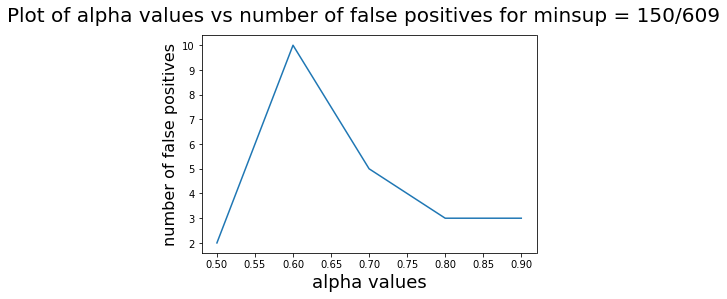

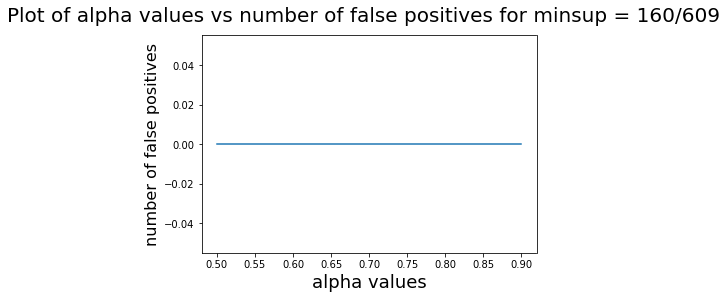

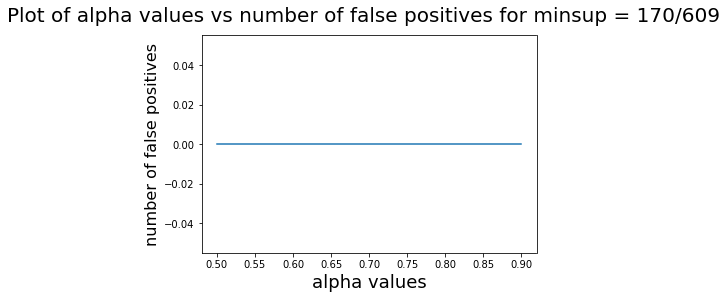

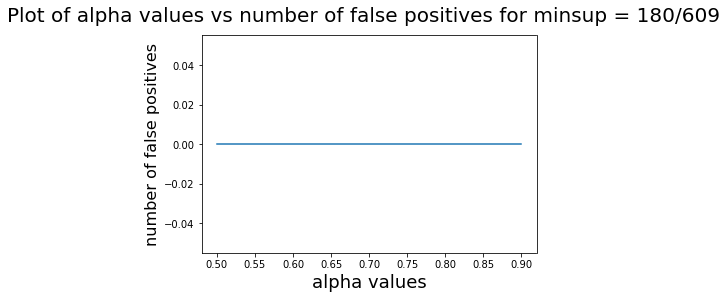

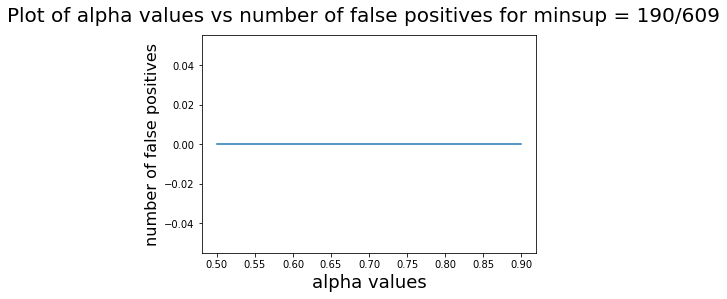

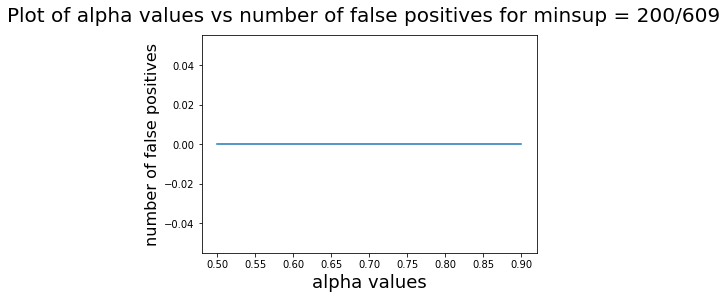

In [69]:
# your code here
#function to calculate false positive count for a particular sampled dataset
def get_False_Positives_count(sampled_fq_itemset, fq_itemset):
    count=0
    #getting all items of the frequent itemsets obtained from the sampled data 
    sampled_fq_itemset = [set(x) for x in sampled_fq_itemset]
    #getting all items of the frequent itemsets obtained from the original data 
    fq_itemset = [set(x) for x in fq_itemset]
    #if a particular itemset is in the frequent itemsets obtained from the sampled data but not in the frequent itemsets obtained from the original data
    #then it is a false positive
    #checking the condtion described
    for item in sampled_fq_itemset:
        if item not in fq_itemset:
          count += 1
    return count

betas=[]

#varying both minsup and alpha values and checking the results. 
#I have varied the values of minsup (MINIMUM SUPPORT) from 150/609
#to 200/609 at an increemntal rate of 10/609 and for each value of minsup sample I have varied the alpha between 0.5 to 0.9 at an incremental rate of 0.1. 
avg_false_positives=[]
avg_num_rules=[]
avg_num_freq=[]
for beta in range(150, 210,10):
  minsup=beta/609
  betas.append(beta)
  alphas=[]
  false_positives=[]

  fp_sum=0
  fp_avg=0
  rules_sum=0
  rules_avg=0
  freq_sum=0
  freq_avg=0
  idxs=0
  print('For Minsup: {}/{}'.format(beta,'609'))
  for alpha in np.arange(0.5, 1,0.1):
    alphas.append(alpha)
    idxs+=1
    print("\nData for Minsup: {}/{} for alpha = {}\n".format(beta,'609',alpha))
    sampled_baskets=random_sampling(baskets, alpha)
    sampled_association_rules, sampled_frequent_itemsets=apriori(sampled_baskets)
    print ("Number of baskets = {}, number of association rules = {}, number of frequent itemsets = {}".format(len(sampled_baskets),len(sampled_association_rules), len(sampled_frequent_itemsets)))
    print_rules(sampled_association_rules)
    fp_count=get_False_Positives_count(sampled_frequent_itemsets, all_frequent_itemsets)
    false_positives.append(fp_count)
    fp_sum+=fp_count
    rules_sum+=len(sampled_association_rules)
    freq_sum+=len(sampled_frequent_itemsets)
    print('Number of false positives = {} \n'.format(fp_count))
  fp_avg=fp_sum/idxs
  freq_avg=freq_sum/idxs
  rules_avg=rules_sum/idxs
  avg_false_positives.append(fp_avg)
  avg_num_rules.append(rules_avg)
  avg_num_freq.append(freq_avg)
  fig=plt.figure()
  plt.plot(alphas,false_positives)
  fig.suptitle('Plot of alpha values vs number of false positives for minsup = {}/{}'.format(beta,'609'), fontsize=20)
  plt.xlabel('alpha values', fontsize=18)
  plt.ylabel('number of false positives', fontsize=16)
  

Text(0, 0.5, 'avg no.of false positives')

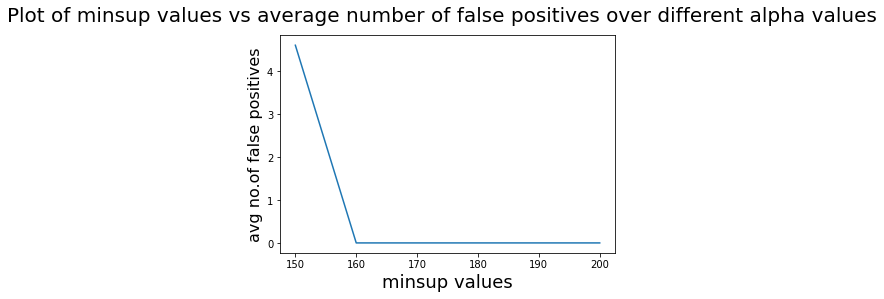

In [70]:
  
  fig=plt.figure()
  plt.plot(betas,avg_false_positives)
  fig.suptitle('Plot of minsup values vs average number of false positives over different alpha values', fontsize=20)
  plt.xlabel('minsup values', fontsize=18)
  plt.ylabel('avg no.of false positives', fontsize=16)

Text(0, 0.5, 'avg no.of frequent itemsets')

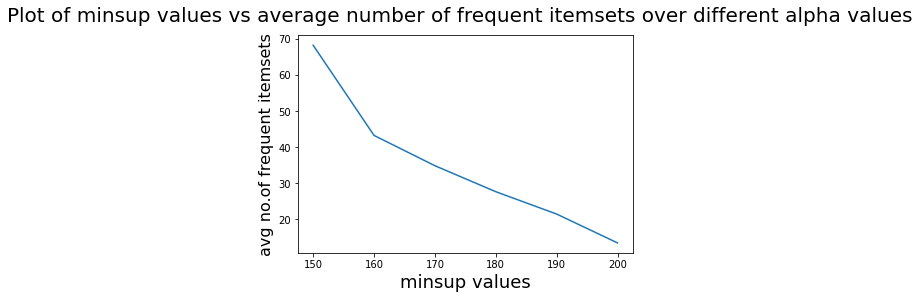

In [71]:
  fig=plt.figure()
  plt.plot(betas,avg_num_freq)
  fig.suptitle('Plot of minsup values vs average number of frequent itemsets over different alpha values', fontsize=20)
  plt.xlabel('minsup values', fontsize=18)
  plt.ylabel('avg no.of frequent itemsets', fontsize=16)

Text(0, 0.5, 'avg no.of association rules')

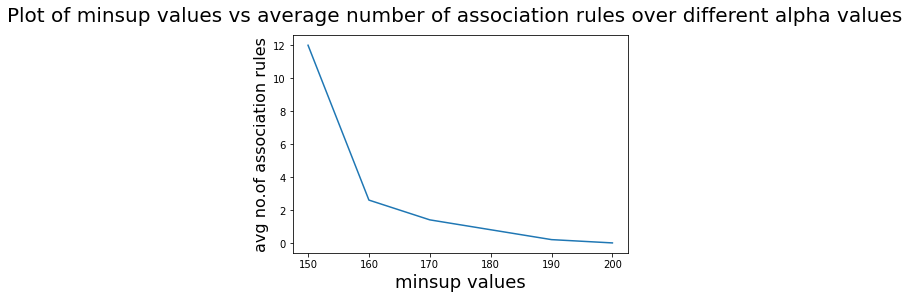

In [72]:
  fig=plt.figure()
  plt.plot(betas,avg_num_rules)
  fig.suptitle('Plot of minsup values vs average number of association rules over different alpha values', fontsize=20)
  plt.xlabel('minsup values', fontsize=18)
  plt.ylabel('avg no.of association rules', fontsize=16)

*your discussion here*

## ANSWER:

###  I have varied the values of minsup (MINIMUM SUPPORT) from 150/609 to 200/609 at an incremntal rate of 10/609 and for each value of minsup sample I have varied the alpha between 0.5 to 0.9 at an incremental rate of 0.1. For each of these combinations I have printed the corresponding number of baskets, number of association rules, number of frequent itemsets, and the association rules as shown above. Also the following graphs are plotted:
1. Plot of alpha values vs number of false positives for all the minsup values
2. Plot of minsup values vs average number of false positives over different alpha values
3. Plot of minsup values vs average number of frequent itemsets over different alpha values
4. Plot of minsup values vs average number of association rules over different alpha values

From the above data, the following can be said:
1. With increase in the minsup values the average number of false positives, frequent itemsets, association rules is decreasing. This is expected as with increasing minsup values less frequency itemsets will get through the minimum threshold support value, thus generating less association rules and less false postives.
2. It can be noted that since with increasing the minsup values the number of false positives is decreasing, so with increasing minsup values we can get more accurate frequency itemsets and association rules. If we want to get more association rules we can always decrease the value minsup.
3. Also it can be seen from the plots that with increasing the value of alpha for a particular minsup, the number of false positives decreases which is as expected since when we sample the data some itemsets which are more frequent in the sampled dataset pass the minsup threshold thus generating a false positive. So, random sampling may lead to generation of false positive frequency itemsets from the dataset. 

### (5pts) Step 5: Extensions and Next Steps

So far, we have been working with a fairly small dataset. For this last question, try your sampling-based approach on the much larger: **Movies 10M** dataset: https://files.grouplens.org/datasets/movielens/ml-10m.zip

First, we need to load this larger dataset:

In [31]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-10m.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [32]:
! ls ml-10M100K/

allbut.pl  movies.dat  ratings.dat  README.html  split_ratings.sh  tags.dat


In [33]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-10M100K/ratings.dat",sep='::', names=["userId", "movieId", "rating", "timestamp"], engine='python')
allRatings

,userId,movieId,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


Now you can begin your sampling over this larger dataset.

In [34]:
# your code here
#generating the new baskets from the large dataset
baskets_new=generate_baskets(allRatings)

In [38]:

minsup=150/609
minconf=0.8
print ("number of baskets: {}".format(len(baskets_new)))
#using the print_random_sampling_data function on the new baskets
alphas,num_assoc,num_freqs=print_random_sampling_data(0.01, 0.09,0.01,baskets_new)

number of baskets: 69863

Data for alpha = 0.01

Count of Frequent 1-itemsets: 38 
 Frequent items:[(1,), (260,), (648,), (1291,), (780,), (2571,), (527,), (150,), (32,), (165,), (296,), (2858,), (1196,), (1198,), (47,), (50,), (1210,), (318,), (457,), (2762,), (588,), (589,), (590,), (592,), (593,), (595,), (1240,), (858,), (349,), (480,), (608,), (356,), (364,), (2028,), (110,), (1270,), (377,), (380,)]
Count of Frequent 2-itemsets: 59 
 Frequent items:[(260, 1196), (260, 1198), (260, 1210), (260, 589), (527, 296), (527, 593), (150, 296), (150, 318), (150, 457), (150, 593), (150, 480), (150, 356), (32, 296), (296, 47), (296, 50), (296, 318), (296, 457), (296, 589), (296, 590), (296, 592), (296, 593), (296, 480), (296, 356), (296, 110), (296, 380), (1196, 1198), (1196, 1210), (50, 593), (318, 457), (318, 593), (318, 480), (318, 356), (318, 110), (457, 589), (457, 592), (457, 593), (457, 480), (457, 356), (457, 110), (457, 380), (589, 592), (589, 593), (589, 480), (589, 356), (589, 110

Text(0, 0.5, 'number of frequent itemsets')

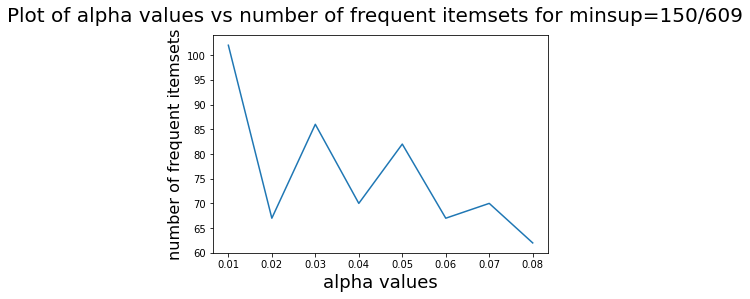

In [39]:
  fig=plt.figure()
  plt.plot(alphas,num_freqs)
  fig.suptitle('Plot of alpha values vs number of frequent itemsets for minsup={}/{}'.format('150','609'), fontsize=20)
  plt.xlabel('alpha values', fontsize=18)
  plt.ylabel('number of frequent itemsets', fontsize=16)

Text(0, 0.5, 'number of association rules')

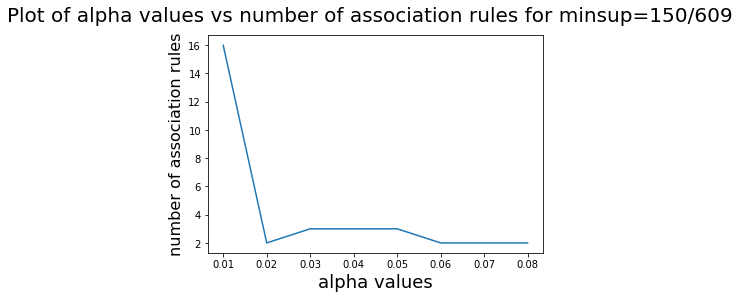

In [40]:
  fig=plt.figure()
  plt.plot(alphas,num_assoc)
  fig.suptitle('Plot of alpha values vs number of association rules for minsup={}/{}'.format('150','609'), fontsize=20)
  plt.xlabel('alpha values', fontsize=18)
  plt.ylabel('number of association rules', fontsize=16)

*your discussion here*

## ANSWER:

### I have varied the values of alpha (random sampling factor) between 0.01 to 0.09 at an incremental rate of 0.01 and printed the number of baskets, number of association rules, number of frequent itemsets, and the association rules for the corresponding alphas as shown above. Also the plot of alpha values vs number of frequent itemsets and  plot of alpha values vs number of association rules for minsup=150/609 is shown above. I have randomly sampled the baskets as there were a total of around 70000 baskets in the original data which is computationally expensive to run the apriori algorithm on. From the above data, the following can be said:

1. The number of frequency itemsets and number of association rules are somewhat increasing for decrease in the value of alpha for some executions of the code when we are executing the above code multiple times, though for the most part the trend is random as the sampling done is random in nature so the apriori algorithm works with random subset of data each time sampling is done.

2. The occasional increase in number of frequency itemsets and number of association rules for decreasing the values of alpha can be attributed to the fact that for decraesing alpha many false positive frequency itemsets and association rules are being generated.

3. We can see some very obvious rules generated here for example:

  a. Star Wars: Episode V - The Empire Strikes Back (1980) --> Star Wars: Episode IV - A New Hope (1977)

  b. Star Wars: Episode VI - Return of the Jedi (1983) --> Star Wars: Episode IV - A New Hope (1977)

which are of not much use to us. But we can also see some very interesting rules here, for example:

  a. Pulp Fiction (1994), Forrest Gump (1994) --> Jurassic Park (1993)

  b. Pulp Fiction (1994), Jurassic Park (1993) --> Forrest Gump (1994)

  c. Fugitive, The (1993), Forrest Gump (1994) --> Jurassic Park (1993)

  d. Jurassic Park (1993), Fugitive, The (1993) --> Forrest Gump (1994)

So it can be said that, for large datasets it can be useful to randomly sample the data as:

1. It becomes computationally less expensive to run the apriori algorithm
2. We can get some useful association rules out of it.